In [2]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations, product, zip_longest
from scipy.stats import skew, kurtosis, gaussian_kde
from collections import Counter
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


%matplotlib inline

breast_cancer = load_breast_cancer()
print(breast_cancer.data.shape)

(569, 30)


In [3]:
def sklearn_data_to_pandas_df(sklearn_data):
    cols = list(sklearn_data['feature_names']) + ['target']
    dataframe = pd.DataFrame(data= np.c_[sklearn_data['data'], sklearn_data['target']], columns= cols)
    return dataframe

def counter_histogram(labels):
    counts = Counter(labels)
    fig, ax = plt.subplots()
    int_keys = [int(k) for k in counts.keys()]
    ax.bar(int_keys, list(counts.values()), color=bar_color)
    ax.set_xticks(sorted(int_keys))

    k_range = max(counts.keys()) - min(counts.keys())
    max_v = max(counts.values())

    def offset(k, v):
        return (k - k_range * 0.0125, v + max_v * 0.01)

    for (k, v) in counts.items():
        ax.annotate(str(v), offset(k, v))

In [4]:
df = sklearn_data_to_pandas_df(breast_cancer)
df['diagnosis'] = np.where(df['target']==0, 'malignant', 'benign')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,malignant


In [5]:
df = df.sample(n=300)

y = 'target'
X = [col for col in df.columns if col not in (y, 'diagnosis')]

In [6]:
description = df.describe(include='all') # include information of numeric and cat vars
coef_variation = description.loc["std"] / description.loc["mean"]
description.loc["coef_var"] = coef_variation
description.sort_values(by="coef_var", axis=1)

,mean fractal dimension,mean smoothness,mean symmetry,worst smoothness,mean texture,worst fractal dimension,worst symmetry,mean radius,worst texture,mean perimeter,...,radius error,perimeter error,compactness error,concavity error,worst concavity,target,mean concave points,mean concavity,area error,diagnosis
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,benign
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188
mean,0.062819,0.095724,0.180547,0.132462,19.369267,0.084384,0.291055,14.073620,25.772733,91.577233,...,0.405831,2.892521,0.025973,0.031500,0.274253,0.626667,0.048638,0.087493,40.831777,NaN
std,0.007328,0.013657,0.029004,0.022649,4.429332,0.019312,0.067473,3.467884,6.415605,23.793572,...,0.279641,2.041582,0.018924,0.023138,0.210412,0.484498,0.037765,0.075101,46.821222,NaN
min,0.049960,0.062510,0.106000,0.081250,9.710000,0.055040,0.156500,7.729000,12.020000,47.980000,...,0.114400,0.757000,0.002252,0.000000,0.000000,0.000000,0.000000,0.000000,6.802000,NaN
25%,0.057495,0.086740,0.160100,0.117750,16.327500,0.071412,0.245950,11.667500,21.150000,74.710000,...,0.229325,1.572750,0.012902,0.015345,0.115900,0.000000,0.020300,0.029312,17.392500,NaN
50%,0.061440,0.095000,0.177850,0.132650,18.835000,0.080220,0.282650,13.275000,25.540000,86.140000,...,0.314650,2.309000,0.020260,0.026380,0.225650,1.000000,0.033375,0.065395,24.260000,NaN
75%,0.066393,0.103975,0.196625,0.145225,21.855000,0.092087,0.317025,15.757500,29.775000,104.250000,...,0.473725,3.360000,0.033772,0.043442,0.385500,1.000000,0.074010,0.120750,44.980000,NaN


In [7]:
high_cova = description.loc["coef_var"].where(lambda x: x > 0.40).dropna().sort_values(ascending=False)
high_cova

area error                  1.14669
mean concavity             0.858366
mean concave points        0.776447
target                     0.773135
worst concavity            0.767219
concavity error            0.734538
compactness error          0.728615
perimeter error            0.705814
radius error               0.689058
fractal dimension error    0.684248
worst area                 0.679854
worst compactness           0.64012
worst concave points       0.573682
mean area                  0.530029
concave points error       0.508962
mean compactness           0.507185
texture error              0.458303
smoothness error           0.445231
Name: coef_var, dtype: object

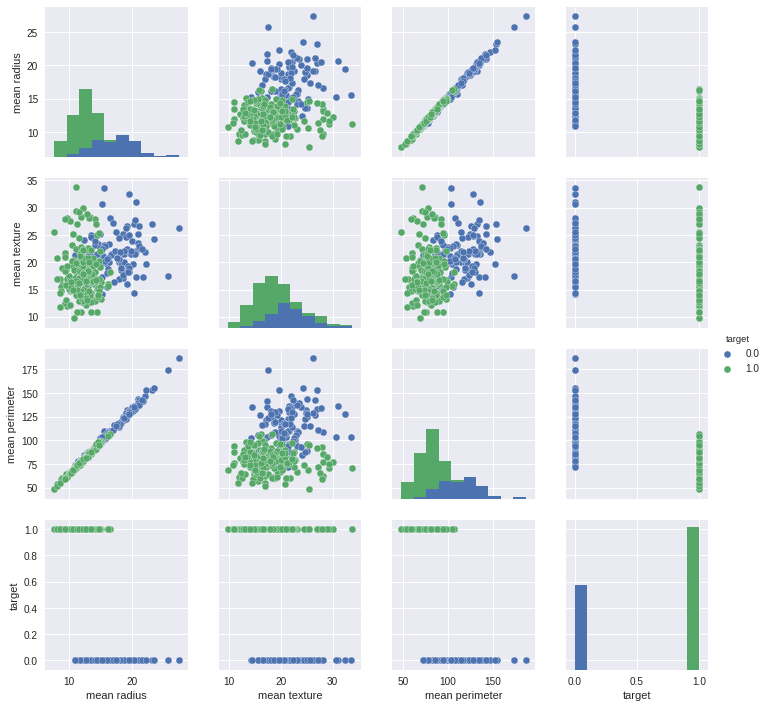

In [8]:
sns.pairplot(df, vars=list(df.columns)[:3]+['target'], hue = 'target')

/home/edward/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


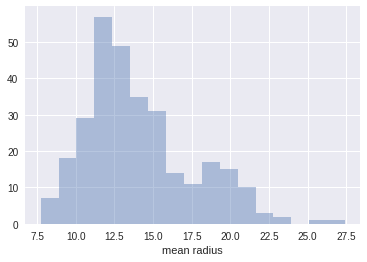

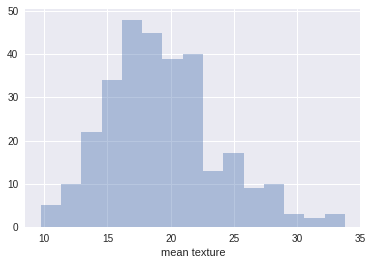

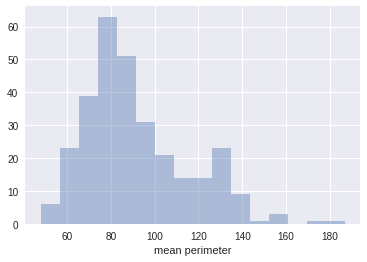

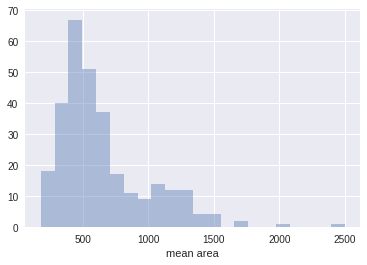

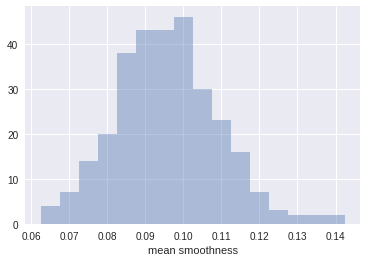

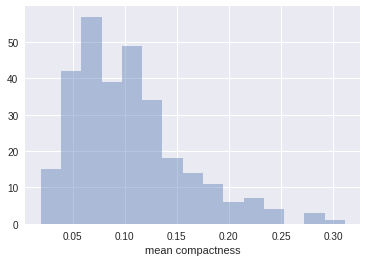

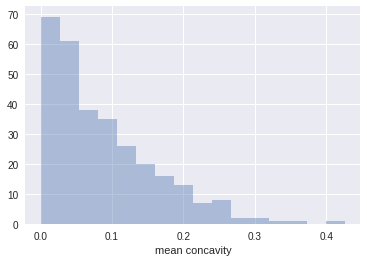

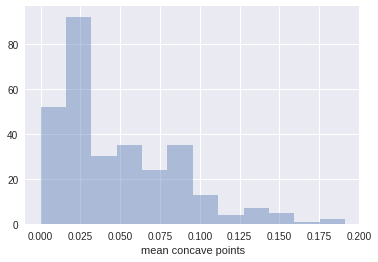

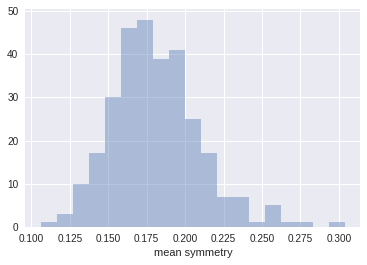

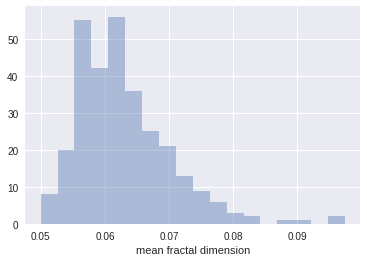

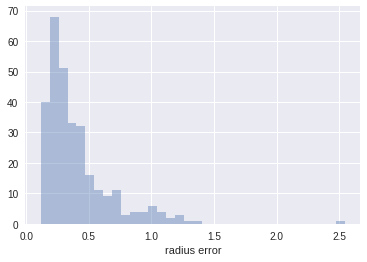

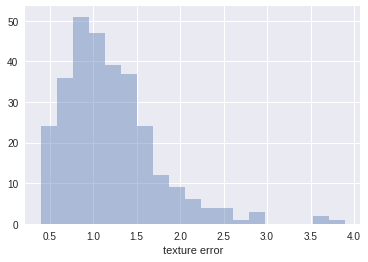

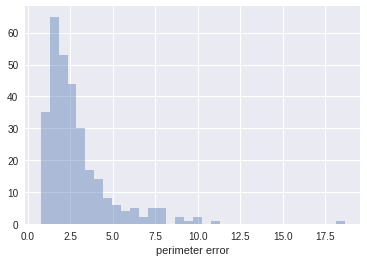

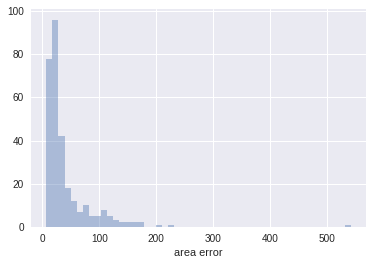

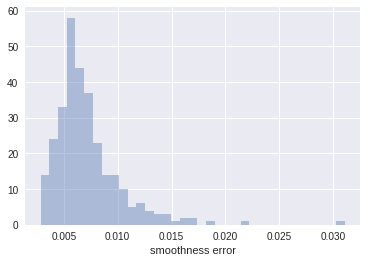

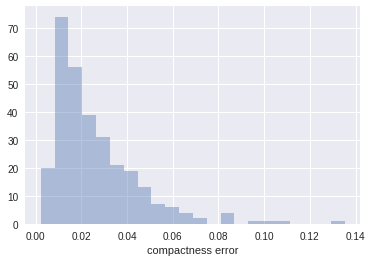

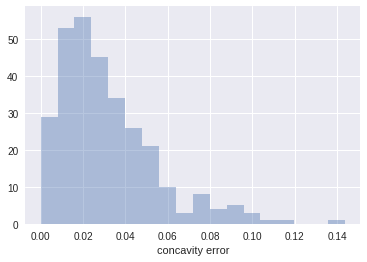

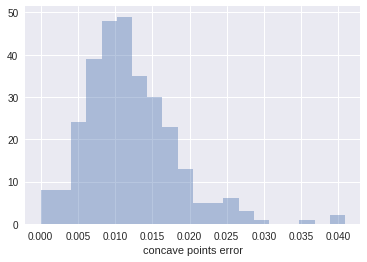

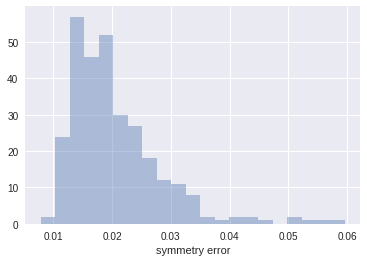

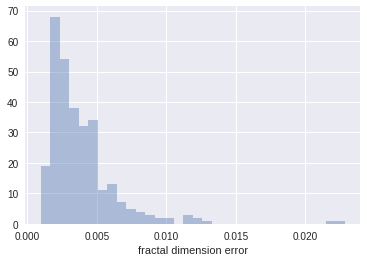

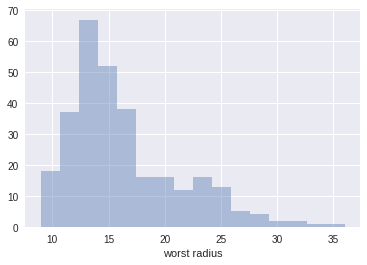

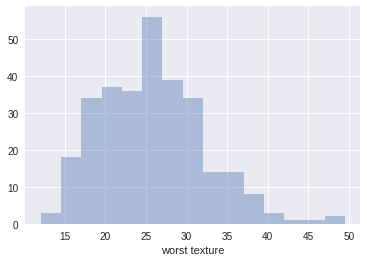

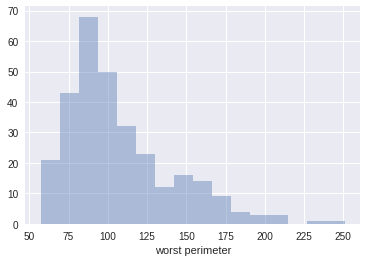

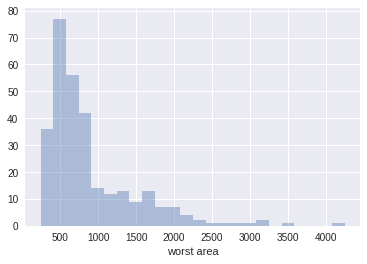

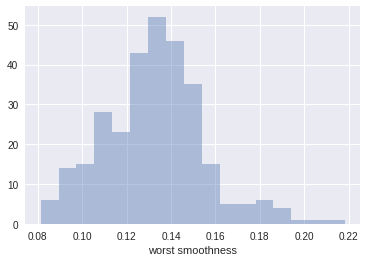

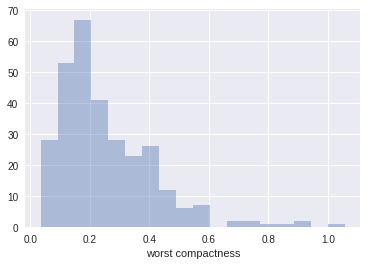

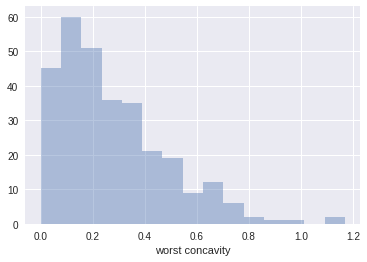

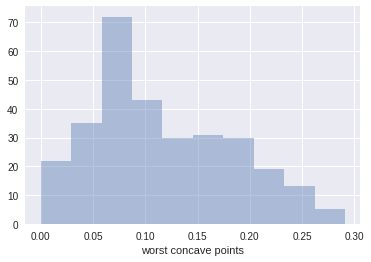

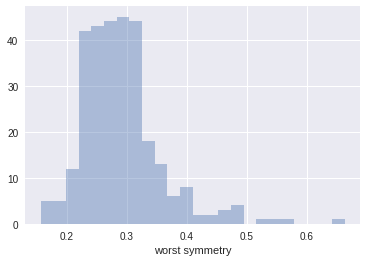

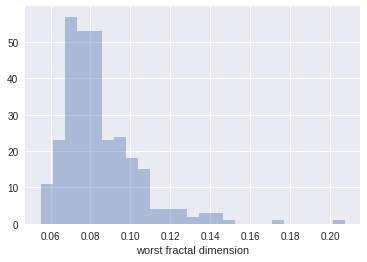

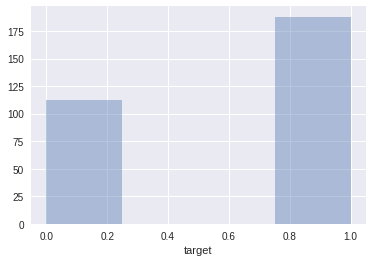

In [10]:
df_numeric = df.select_dtypes([np.int, np.float])
df_cat = df.select_dtypes([np.object])

for i, col in enumerate(df_numeric.columns):
    plt.figure(i)
    sns.distplot(df_numeric[col], kde=False)

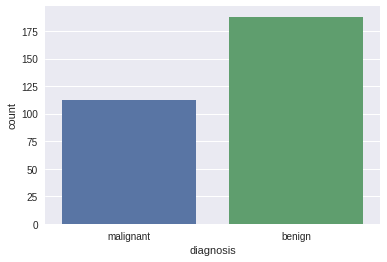

In [11]:
for i, col in enumerate(df_cat.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df_cat)

## Identifying structure through unsupervised learning
* In addition to looking for deviations, it is important to identify the latent structure in the data. 
* Hierarchical clustering algorithms are good because you don't need to specify a cluster count. 

* Hierarchical clustering algorithms also gives your variables a partial order, which you can take advantage of. 
* My preferred form of clustering is a technique called HDBSCAN.
* It takes the minimum cluster size as the only parameter, and it produces both discrete and hierarchical clustering.

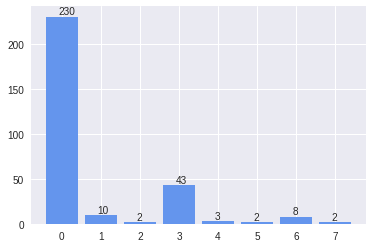

In [13]:
bar_color = "cornflowerblue"
standardized_df = pd.DataFrame(StandardScaler().fit_transform(df_numeric), columns=df_numeric.columns,
                               index=df_numeric.index)


# fit = DBSCAN(min_samples=15).fit(standardized_df)
fit = SpectralClustering(n_clusters = 8).fit(standardized_df)
base_sample_clusters = pd.Series(fit.labels_, index=standardized_df.index)
counter_histogram(base_sample_clusters)

In [14]:
standardized_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,...,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,4.874804e-16,1.236048e-15,1.564489e-15,8.650488e-16,8.189745e-16,-7.627232e-16,6.220950e-16,9.029814e-17,3.421199e-15,9.364731e-15,...,1.979158e-15,-3.523693e-16,-1.231284e-15,1.943630e-15,7.586524e-16,-9.714451e-16,8.246182e-16,-2.836620e-16,-5.362377e-16,6.439294e-17
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,...,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-1.832594e+00,-2.184394e+00,-1.835373e+00,-1.369774e+00,-2.436046e+00,-1.607100e+00,-1.166950e+00,-1.290069e+00,-2.574521e+00,-1.757684e+00,...,-2.147220e+00,-1.458755e+00,-1.071512e+00,-2.264919e+00,-1.354908e+00,-1.305586e+00,-1.746039e+00,-1.997542e+00,-1.521990e+00,-1.295597e+00
25%,-6.949888e-01,-6.878800e-01,-7.100832e-01,-6.730787e-01,-6.589024e-01,-7.768517e-01,-7.759920e-01,-7.516303e-01,-7.061482e-01,-7.277722e-01,...,-7.217492e-01,-6.905816e-01,-6.238709e-01,-6.506652e-01,-7.013535e-01,-7.538418e-01,-7.628545e-01,-6.696049e-01,-6.727812e-01,-1.295597e+00
50%,-2.306751e-01,-1.208217e-01,-2.288987e-01,-3.057886e-01,-5.307471e-02,-2.265796e-01,-2.947380e-01,-4.048279e-01,-9.314236e-02,-1.885551e-01,...,-3.633675e-02,-2.844311e-01,-3.316928e-01,8.304193e-03,-2.969150e-01,-2.313749e-01,-2.202588e-01,-1.247721e-01,-2.159540e-01,7.718450e-01
75%,4.863755e-01,5.621359e-01,5.335030e-01,3.907610e-01,6.051945e-01,5.006945e-01,4.435649e-01,6.729783e-01,5.552624e-01,4.883707e-01,...,6.248755e-01,5.510950e-01,3.094069e-01,5.644478e-01,5.104328e-01,5.295941e-01,7.279960e-01,3.855446e-01,3.995892e-01,7.718450e-01
max,3.854997e+00,3.265698e+00,4.012934e+00,5.384699e+00,3.430801e+00,3.935862e+00,4.520203e+00,3.783988e+00,4.263516e+00,4.732057e+00,...,3.710793e+00,4.174224e+00,5.584708e+00,3.800695e+00,4.906197e+00,4.264221e+00,2.630521e+00,5.533620e+00,6.385802e+00,7.718450e-01


In [15]:
X_tsne = TSNE(learning_rate=100).fit_transform(standardized_df[X])
X_pca = PCA().fit_transform(standardized_df[X])

In [24]:
df_manifold = pd.DataFrame({'tsne_0':X_tsne[:, 0], 
                            'tsne_1':X_tsne[:, 1], 
                            'pca_0': X_pca[:, 0], 
                            'pca_1': X_pca[:, 1], 
                            y: df[y]})

In [25]:
df_manifold.head()

,pca_0,pca_1,target,tsne_0,tsne_1
105,3.211169,4.074718,0.0,3.427841,-0.514483
385,-0.508845,-1.385265,0.0,0.433429,5.587778
375,-0.104203,-0.114992,1.0,-1.650665,4.184301
178,-4.967344,-3.438928,1.0,-8.620075,7.740708
363,-0.769666,-2.143402,1.0,0.449422,6.399863


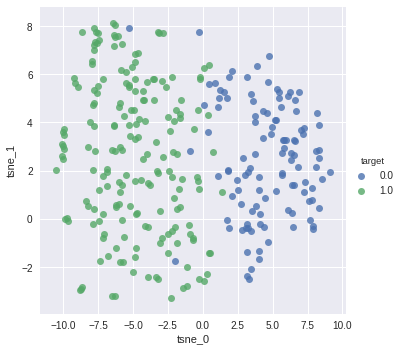

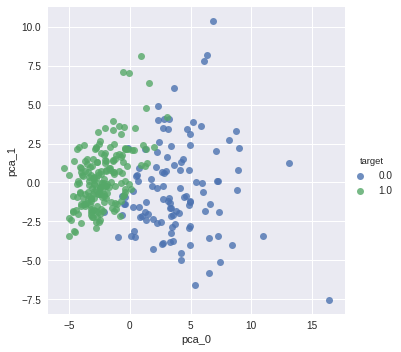

In [36]:
sns.lmplot("tsne_0", "tsne_1", data=df_manifold, hue=y, fit_reg=False)
sns.lmplot("pca_0", "pca_1", data=df_manifold, hue=y, fit_reg=False)